In [51]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import requests


In [52]:
# Binance API endpoint for historical data
api_url = 'https://api.binance.com/api/v3/klines'

# Parameters for the API request (Bitcoin, 1 day interval, 1000 data points)
params = {
    'symbol': 'BNBUSDT',
    'interval': '1w',
    'limit': 10000
}

# Send GET request to Binance API
response = requests.get(api_url, params=params)
data = response.json()

# Extracting relevant data from the API response
df = pd.DataFrame(
    data, columns=[
        'openTime',
        'open',
        'high',
        'low',
        'close',
        'volume',
        'closeTime',
        'quoteAssetVolume',
        'numberOfTrades',
        'takerBuyBaseAssetVolume',
        'takerBuyQuoteAssetVolume',
        'ignore'
    ]
)

# Renaming columns for clarity
df.columns = [
    'Open Time',
    'Open',
    'High',
    'Low',
    'Close',
    'Volume',
    'Close Time',
    'Quote Asset Volume', 
    'Number of Trades',
    'Taker Buy Base Asset Volume',
    'Taker Buy Quote Asset Volume',
    'Ignore'
]


df.drop(
    ['Close Time',
    'Quote Asset Volume',
    'Number of Trades',
    'Taker Buy Base Asset Volume',
    'Taker Buy Quote Asset Volume', 
    'Ignore'],
    axis=1, inplace=True
)

# Converting timestamps to datetime format
df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')

# Converting columns to numeric for further manipulation
cols = df.columns.drop('Open Time')
cols
df[cols] = df[cols].apply(pd.to_numeric)

In [53]:
# Rename columns to 'ds' and 'y' for Prophet
df = df.rename(columns={'Open Time': 'ds', 'Close': 'y'})


In [54]:
# Initialize Prophet model
model = Prophet()

# Fit the model to the data
model.fit(df)


23:17:36 - cmdstanpy - INFO - Chain [1] start processing


23:17:36 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
# Create a DataFrame for future predictions
future = model.make_future_dataframe(periods=30)  # Predicting 30 days into the future

# Make predictions
forecast = model.predict(future)


/home/nurlan/projects/crypto_prediction/binance/bitcoin_using_RF/.venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/nurlan/projects/crypto_prediction/binance/bitcoin_using_RF/.venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 1000x600 with 0 Axes>

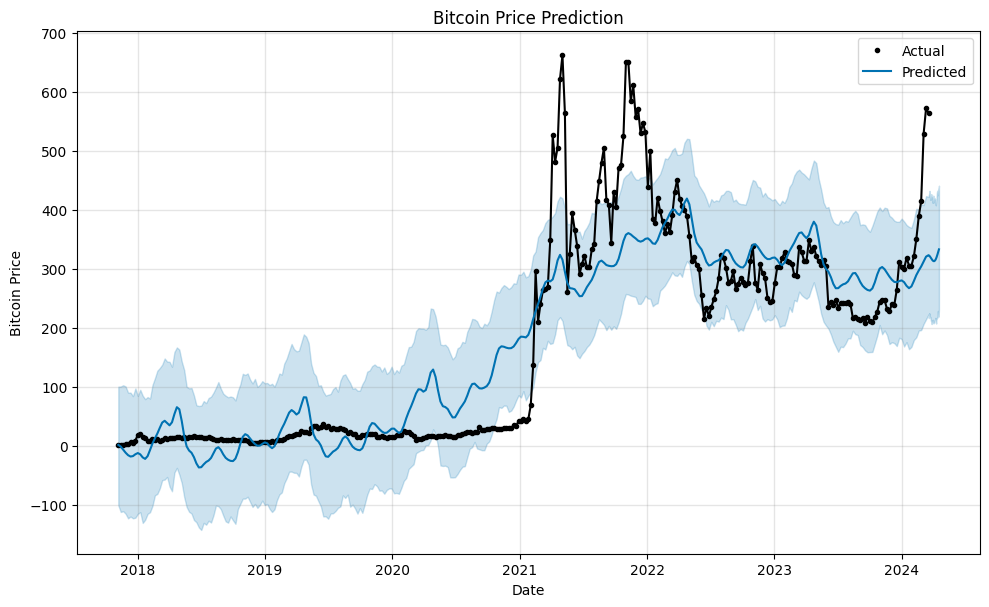

In [56]:
# Plot actual and predicted prices
plt.figure(figsize=(10, 6))
model.plot(forecast, xlabel='Date', ylabel='Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.legend(['Actual', 'Predicted'])

plt.gca().get_lines()[0].set_linestyle('-')
plt.show()
